# Schlumberger Sounding and Middle Gradient Survey
------------
### Lillian Hanson, Schlumberger (Group A)
* Due Date: October 22, 2025

In [2]:
from dc_utils.dc_sounding import DCSoundingInteract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data processing
1) Each group should share their data sets with the entire class. I would suggest sharing data in a format that lists the locations of A, B, M, and N electrodes, and the measured normalized voltage. Possibly:
|A_east | A_north | B_east| B_north| M_east| M_north| N_east| N_north| V/I | STD|
|-------|---------|-------|--------|-------|--------|-------|--------|-----|----|
| #| #| #| #| #| #| #| #| #| # |
| #|# | #| #| #| #| #| #| #| # |



In [41]:
# import data sets
schlum = pd.read_csv('data/08-data/Lab08-SchlumDogz-Combined-Data(in).csv')
schlum = pd.DataFrame(schlum)
schlum = schlum.drop(16)

2. Calculate the apparent resistivity for each data point.

$$ \rho_a = 2\pi\frac{V}{I}\left(\frac{1}{R_{AM}} -\frac{1}{R_{BM}} - \frac{1}{R_{AN}} + \frac{1}{R_{BN}}\right)^{-1} $$


In [17]:
## Electrode locations 

schlum_locs = pd.read_csv('data/08-data/lab08-schlum-locations(Sheet1).csv')
A_x = schlum_locs['A']
B_x = schlum_locs['B']
M_x = schlum_locs['M']
N_x = schlum_locs['N']

schlum_locs['V/I (ohms)'] = schlum['V/I (ohms)']

schlum_locs = schlum_locs.dropna(subset=['A', 'B', 'M', 'N', 'V/I (ohms)'])
schlum_locs = schlum_locs[~((schlum_locs['A'] == schlum_locs['B']) | 
                            (schlum_locs['M'] == schlum_locs['N']))]

A_x = schlum_locs['A']
B_x = schlum_locs['B']
M_x = schlum_locs['M']
N_x = schlum_locs['N']

In [33]:
# Compute term inside parentheses
R_AM = (schlum_locs['A'] - schlum_locs['M']).abs()
R_BM = (schlum_locs['B'] - schlum_locs['M']).abs()
R_AN = (schlum_locs['A'] - schlum_locs['N']).abs()
R_BN = (schlum_locs['B'] - schlum_locs['N']).abs()

geom_inv = (1.0 / R_AM) - (1.0 / R_BM) - (1.0 / R_AN) + (1.0 / R_BN)
K = 1 / geom_inv

In [34]:
# Pull V/I from the data
VI = schlum['V/I (ohms)']

In [46]:
# Apparent resistivity

rho_a = 2 * np.pi * VI * K
schlum['Apparent Resistivity (ohm·m)']= rho_a
pd.DataFrame(rho_a)

,0
0,18.367007
1,17.974937
2,18.147881
3,16.227708
4,15.338261
5,14.502943
6,13.700339
7,10.123625
8,8.323792
9,7.103134


In [37]:
#  AB/2 for plot

AB_2 = (A_x - B_x).abs() / 2
schlum['AB/2 (m)'] = AB_2

3. Plot the Schlumberger sounding data set with the following two axes, both on a log scale:
    * AB/2 on the vertical axis, increasing downwards.
    * Apparent resistivity on the horizontal axis.

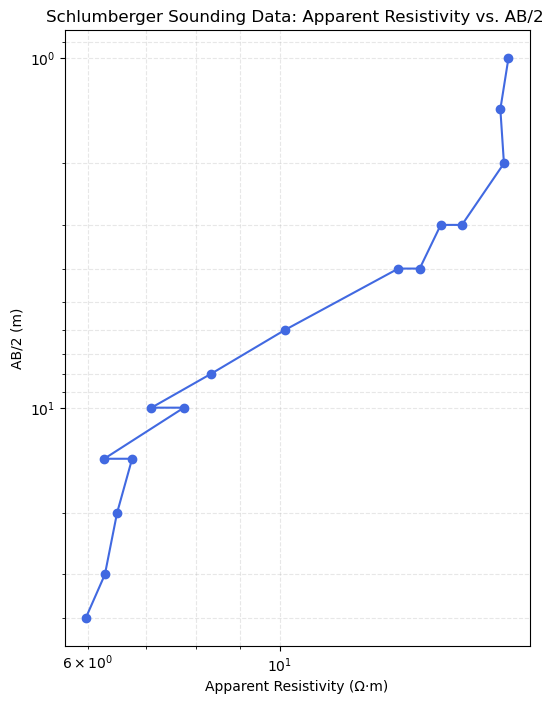

In [39]:
# schlumberger plot

plt.figure(figsize=(6,8))
plt.loglog(rho_a, AB_2, 'o-', color='royalblue')
plt.gca().invert_yaxis() 
plt.xlabel('Apparent Resistivity (Ω·m)')
plt.ylabel('AB/2 (m)')
plt.title('Schlumberger Sounding Data: Apparent Resistivity vs. AB/2 ')
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.show()

4. For the middle gradient survey make two 2D maps of your data. One for the normalized voltage (V/I), and another for the apparent resistivity. Use the center point of the M-N electrode dipole pair as the location for these points.

In [52]:
# load gradient survey data
grad = pd.read_csv('data/08-data/Lab08-MN-data.csv')

In [53]:
# convert units, compute electrode distances

grad['V/I (ohms)'] = grad['V/I (mOhm)'] * 1e-3    # mΩ → Ω
grad['I (A)'] = grad['I mA'] * 1e-3               # mA → A

def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

R_AM = dist(grad['A_east (m)'], grad['A_north (m)'], grad['M_east (m)'], grad['M_north (m)'])
R_BM = dist(grad['B_east (m)'], grad['B_north (m)'], grad['M_east (m)'], grad['M_north (m)'])
R_AN = dist(grad['A_east (m)'], grad['A_north (m)'], grad['N_east (m)'], grad['N_north (m)'])
R_BN = dist(grad['B_east (m)'], grad['B_north (m)'], grad['N_east (m)'], grad['N_north (m)'])

In [54]:
# calculate K
geom_inv_grad = (1/R_AM) - (1/R_BM) - (1/R_AN) + (1/R_BN)
K_grad = 1/geom_inv_grad


In [56]:
# apparent resistivity

rho_a = 2 * np.pi * grad['V/I (ohms)'] * K_grad

grad['Apparent Resistivity (ohm·m)'] = rho_a

In [57]:
# Compute MN center coordinates for plotting
grad['MN_center_east'] = (grad['M_east (m)'] + grad['N_east (m)']) / 2
grad['MN_center_north'] = (grad['M_north (m)'] + grad['N_north (m)']) / 2

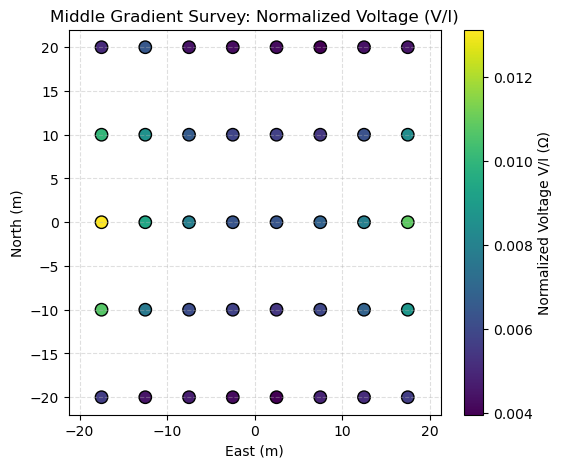

In [58]:
# normalized voltage
plt.figure(figsize=(6,5))
sc1 = plt.scatter(grad['MN_center_east'], grad['MN_center_north'],
                  c=grad['V/I (ohms)'], cmap='viridis', s=80, edgecolor='k')
plt.colorbar(sc1, label='Normalized Voltage V/I (Ω)')
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.title('Middle Gradient Survey: Normalized Voltage (V/I)')
plt.axis('equal')
plt.grid(True, ls='--', alpha=0.4)
plt.show()

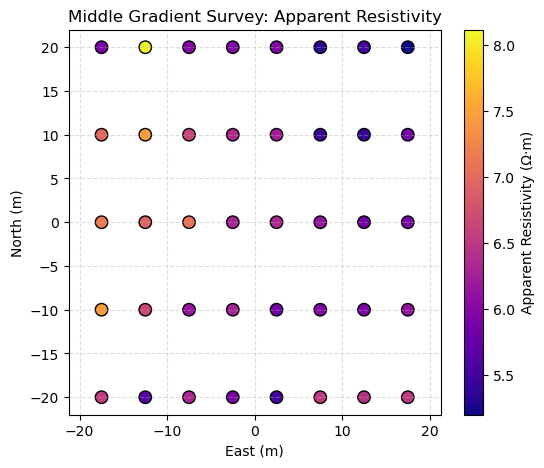

In [59]:
# apparent resistivity

plt.figure(figsize=(6,5))
sc2 = plt.scatter(grad['MN_center_east'], grad['MN_center_north'],
                  c=grad['Apparent Resistivity (ohm·m)'], cmap='plasma', s=80, edgecolor='k')
plt.colorbar(sc2, label='Apparent Resistivity (Ω·m)')
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.title('Middle Gradient Survey: Apparent Resistivity')
plt.axis('equal')
plt.grid(True, ls='--', alpha=0.4)
plt.show()

## Deliverables
Submit an informal report detailing:

1. Your name, lab title
2. Description of the objectives and the field procedure
3. A section containing the processed Schlumberger sounding data and a qualitative interpretation.
    * How does the apparent resistivity change with AB/2?
    * What might this suggest about how the resistivity of Kafadar changes with depth? 
4. A section containing the processed gradient data and a qualitative interpretation.
    * How does the apparent resistivity change laterally?
    * Are there any points of interest in the survey?
5. A concluding section summarizing your work and speculating how to use these two types of survey combined to tackle a problem that requires understanding of 3D subsurface geo-electrical structure.
